In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Importing training set
df_set = pd.read_csv('data/Google_Stock_Price_Train.csv')

In [4]:
training_set = df_set.iloc[:,1:2].values #only first index, values to get numpy array

In [5]:
training_set.shape

(1258, 1)

In [6]:
df_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
#Feature Scaling
#Normalization 
#x_norm = x-min(x)/max(x)-min(x)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
# create data structure with 60 timestamp and 1 output -- 60 previous financial days
# 3 months data considered to predict (t+1) oe the next day stock price 
x_train = []
y_train = []
for i in range(60, 1258):
    #60 to 1257
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
    

In [10]:
X_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
X_train.shape

(1198, 60)

In [12]:
## Reshaping -- add new feature
X_train = np.reshape(X_train,newshape= (X_train.shape[0],X_train.shape[1],1)) # read laer shape in Keras documentation

In [13]:
X_train.shape

(1198, 60, 1)

In [30]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [14]:
##Building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [16]:
regressor = Sequential()
# first LSTM layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# second layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# third layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
#fourth layer
regressor.add(LSTM(units=50)) # because last LSTM layer,so NO sequence
regressor.add(Dropout(0.2))
#output layer
regressor.add(Dense(units=1))
                  

In [17]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
regressor.fit(X_train,y_train, epochs =50, batch_size=32)

Epoch 1/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0043
Epoch 2/50
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0035
Epoch 3/50
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0041
Epoch 4/50
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0041
Epoch 5/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0047
Epoch 6/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0038
Epoch 7/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0038
Epoch 8/50
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0035
Epoch 9/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0036
Epoch 10/50
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0033
Epoch 11/50
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0034
Epoch 12/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.

In [25]:
df_test = pd.read_csv('data/Google_Stock_Price_Test.csv')

In [26]:
real_stock_price = df_test.iloc[:,1:2].values

In [27]:

real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [31]:
# Now concatenation is required
dataset_total = pd.concat((df_set['Open'],df_test['Open']), axis=0) # line by line == 0
inputs = dataset_total[len(dataset_total)-len(df_test)-60:].values

In [37]:
len(inputs)

80

In [35]:
inputs = inputs.reshape(-1,1)

In [38]:
inputs = sc.transform(inputs) ## NO fit here

In [44]:
inputs[1: 4,0]

array([0.93113327, 0.92750577, 0.94415507])

In [49]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test    

[array([0.9299055 , 0.93113327, 0.92750577, 0.94415507, 0.93876032,
        0.93403527, 0.93483518, 0.9313937 , 0.94636878, 0.96569685,
        0.97510976, 0.95966962, 0.97808617, 1.        , 0.98076494,
        0.97083116, 0.98450406, 0.96054394, 0.9371419 , 0.92841729,
        0.90804747, 0.8771858 , 0.92153434, 0.93809063, 0.93165414,
        0.95254483, 0.88812412, 0.88637547, 0.87032145, 0.88563137,
        0.90743359, 0.91571173, 0.89941588, 0.91805566, 0.9089404 ,
        0.9024853 , 0.89456061, 0.91600938, 0.9132934 , 0.88979835,
        0.86589404, 0.89030062, 0.90335962, 0.89642086, 0.91777662,
        0.93176576, 0.94114145, 0.95762334, 0.96413424, 0.96402262,
        0.96971501, 0.95077759, 0.96294367, 0.96123223, 0.95475854,
        0.95204256, 0.95163331, 0.95725128, 0.93796041, 0.93688146]),
 array([0.93113327, 0.92750577, 0.94415507, 0.93876032, 0.93403527,
        0.93483518, 0.9313937 , 0.94636878, 0.96569685, 0.97510976,
        0.95966962, 0.97808617, 1.        , 0.

In [50]:
X_test = np.array(X_test)

In [52]:
X_test.shape

(20, 60)

In [51]:
X_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [53]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [57]:
predicted_stock_prices = regressor.predict(X_test)

In [58]:
## inverse the scaling
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

In [59]:
predicted_stock_prices

array([[786.18634],
       [784.32086],
       [782.8117 ],
       [781.92206],
       [782.1311 ],
       [783.9811 ],
       [787.292  ],
       [791.2107 ],
       [795.02594],
       [798.2497 ],
       [800.62317],
       [802.055  ],
       [802.6295 ],
       [802.668  ],
       [802.47656],
       [803.0531 ],
       [805.05475],
       [808.7079 ],
       [813.2594 ],
       [816.7101 ]], dtype=float32)

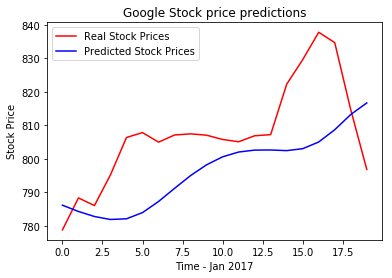

In [65]:
# VISUALIZING THE RESULTS
plt.plot(real_stock_price, color = 'red', label='Real Stock Prices' )
plt.plot(predicted_stock_prices, color = 'blue', label='Predicted Stock Prices' )
plt.title("Google Stock price predictions")
plt.xlabel('Time - Jan 2017')
plt.ylabel('Stock Price')
plt.legend()
plt.show()